<a href="https://colab.research.google.com/github/pedro162/machine_learn/blob/main/natural_language_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import bs4 as bs
import urllib.request
import nltk
import spacy

In [2]:
!python3 -m spacy download pt

⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 20.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
pln = spacy.load('pt_core_news_sm')
pln

In [4]:
document = pln('Estou aprendendo processamento de liguagem natural, curso em Curitiba')

In [5]:
type(document)

spacy.tokens.doc.Doc

In [6]:
for token in document:
  print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
liguagem NOUN
natural ADJ
, PUNCT
curso NOUN
em ADP
Curitiba PROPN


In [7]:
for token in document:
  print(token.text, token.lemma_)

Estou estar
aprendendo aprender
processamento processamento
de de
liguagem liguagem
natural natural
, ,
curso curso
em em
Curitiba Curitiba


In [8]:
document_2 = pln('Encontrei encontraram encontrarão encontrariam cusando cursei')
[token.lemma_ for token in document_2]

['Encontrei', 'encontrar', 'encontrar', 'encontrar', 'cusar', 'cursei']

In [9]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [10]:
stimmer = nltk.stem.RSLPStemmer()
stimmer.stem('aprender')

'aprend'

In [11]:
for token in document:
  print(token.text, token.lemma_, stimmer.stem(token.text))

Estou estar est
aprendendo aprender aprend
processamento processamento process
de de de
liguagem liguagem ligu
natural natural natur
, , ,
curso curso curs
em em em
Curitiba Curitiba curitib


###Text loading

In [12]:
data = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial').read()

In [13]:
data

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width

In [14]:
html_data = bs.BeautifulSoup(data, 'lxml')
html_data

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-w

In [15]:
paragraphs = html_data.find_all('p')

In [16]:
len(paragraphs)

64

In [17]:
paragraphs[1].text

'Algumas das principais áreas relacionadas à IA incluem:\n'

In [18]:
content = ''

for p in paragraphs:
  content += p.text

In [19]:
content

'A inteligência artificial (de sigla: IA; do inglês: artificial intelligence, de sigla: AI) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1][2] É também um conjunto de novas tecnologias que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,[2][3] representando um marco histórico na computação moderna.[3] Embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplina.\nAlgumas das principais áreas relacionadas à IA incluem:\nÉ difícil definir especificamente a Inteligência Artificial, mas ao longo do tempo seguiu essas quatro linhas de pensamento:[1]\nÉ um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[4] É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a 

In [20]:
content = content.lower()
content

'a inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1][2] é também um conjunto de novas tecnologias que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,[2][3] representando um marco histórico na computação moderna.[3] embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplina.\nalgumas das principais áreas relacionadas à ia incluem:\né difícil definir especificamente a inteligência artificial, mas ao longo do tempo seguiu essas quatro linhas de pensamento:[1]\né um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[4] é possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a 

In [21]:
pln = spacy.load('pt_core_news_sm')
pln

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [22]:
string = 'turing'
search_token = pln(string)

In [23]:
pln.vocab

In [24]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, search_token)

In [25]:
doc = pln(content)
matches = matcher(doc)
matches

[(8661325627334373315, 3463, 3464),
 (8661325627334373315, 3473, 3474),
 (8661325627334373315, 3629, 3630),
 (8661325627334373315, 3634, 3635),
 (8661325627334373315, 3640, 3641),
 (8661325627334373315, 3703, 3704),
 (8661325627334373315, 4356, 4357),
 (8661325627334373315, 5573, 5574),
 (8661325627334373315, 5708, 5709),
 (8661325627334373315, 5803, 5804),
 (8661325627334373315, 5920, 5921)]

In [26]:
doc[3463:3464], doc[3463-5:3464+5]

(turing, uma contribuição prática de alan turing foi o que se chamou)

In [27]:
doc[3473:3474], doc[3473-5:3474+5],

(turing, chamou depois de teste de turing (tt),[34] de 1950)

In [28]:
matches[0],matches[0][1], matches[0][2]

((8661325627334373315, 3463, 3464), 3463, 3464)

In [29]:
from IPython.core.display import HTML
number_of_words = 50
doc = pln(content)
matches = matcher(doc)
display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Results: </strong></p> {len(matches)}"""))
text = ""

for i in matches:
  start = i[1] - number_of_words

  if start < 0:
    start = 0

  end = i[2] + number_of_words

  if end >= len(doc):
    end = len(doc)

  text += str(doc[start:end]).replace(string, f"<mark>{string}</mark>")
  text += "<br/><br/>"

display(HTML(f"""...{text}..."""))

###NER

In [30]:
for entity in doc.ents:
  print(entity.text, entity.label_)

pensamento:[1 MISC
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
brasil LOC
allen newell PER
herbert simon PER
mccarty PER
marvin minsky PER
mit ORG
darthmouth LOC
estados unidos LOC
fifth generation MISC
japão LOC
prolog MISC
gpt-3[21 MISC
google ORG
wikipédia MISC
john mccarthy PER
andreas kaplan PER
michael haenlein definem PER
john mccarthy PER
john haugeland PER
good PER
w. grey walter PER
besta de johns hopkins ORG
universidade de princeton LOC
ratio club LOC
inglaterra LOC
david rumelhart PER
isaac asimov PER
steven spielberg PER
robótica.[8 ORG
stephen hawking PER
alan turing PER
turing PER
turing PER
turing PER
turing PER
turing PER
joseph weizenbaum PER
mit ORG
a.l.i.c.e MISC
java MISC
intelligence markup language PER
alicebots LOC
programáveis.[35][36 O

In [31]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

###Cloud of words and sto pwords

In [32]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'estivemos', 'iniciar', 'sete', 'até', 'assim', 'pontos', 'vossa', 'era', 'zero', 'nossos', 'és', 'vocês', 'coisa', 'nessa', 'vêm', 'estão', 'nesse', 'aqui', 'nossa', 'muitos', 'dez', 'fazes', 'embora', 'sua', 'nossas', 'tanta', 'somos', 'dizer', 'inicio', 'geral', 'meus', 'das', 'devem', 'eu', 'vários', 'me', 'dizem', 'suas', 'local', 'muito', 'fazia', 'lado', 'exemplo', 'porquanto', 'usar', 'parte', 'ser', 'mês', 'diz', 'estará', 'grupo', 'oitava', 'custa', 'dezassete', 'o', 'contra', 'minhas', 'te', 'sempre', 'inclusive', 'essas', 'tipo', 'porém', 'grandes', 'quando', 'baixo', 'faço', 'nível', 'faz', 'cima', 'cujo', 'oito', 'obrigado', 'primeira', 'já', 'para', 'qualquer', 'vezes', 'naquele', 'de', 'meses', 'ela', 'sexta', 'à', 'dá', 'antes', 'teus', 'às', 'do', 'ainda', 'aqueles', 'maioria', 'cento', 'somente', 'meio', 'ali', 'numa', 'sistema', 'num', 'podia', 'daquela', 'caminho', 'conhecida', 'podem', 'três', 'sexto', 'cá', 'deste', 'depois', 'acerca', 'nosso', 'aquela', 'todos'

In [33]:
len(STOP_WORDS)

416

In [34]:
pln.vocab['usa'].is_stop

True

In [35]:
doc = pln(content)
token_list = []

for token in doc:
  token_list.append(token.text)

In [36]:
print(token_list)

['a', 'inteligência', 'artificial', '(', 'de', 'sigla', ':', 'ia', ';', 'do', 'inglês', ':', 'artificial', 'intelligence', ',', 'de', 'sigla', ':', 'ai', ')', 'é', 'um', 'campo', 'de', 'estudo', 'multidisciplinar', 'que', 'abrange', 'varias', 'áreas', 'do', 'conhecimento.[1][2', ']', 'é', 'também', 'um', 'conjunto', 'de', 'novas', 'tecnologias', 'que', 'permitem', 'aos', 'aparelhos', 'smart', 'executarem', 'várias', 'funções', 'avançadas', 'de', 'modo', 'quase', 'autônomo,[2][3', ']', 'representando', 'um', 'marco', 'histórico', 'na', 'computação', 'moderna.[3', ']', 'embora', 'seu', 'desenvolvimento', 'tenha', 'avançado', 'mais', 'na', 'ciência', 'da', 'computação', ',', 'sua', 'abordagem', 'interdisciplinar', 'envolve', 'contribuições', 'de', 'diversas', 'disciplina', '.', '\n', 'algumas', 'das', 'principais', 'áreas', 'relacionadas', 'à', 'ia', 'incluem', ':', '\n', 'é', 'difícil', 'definir', 'especificamente', 'a', 'inteligência', 'artificial', ',', 'mas', 'ao', 'longo', 'do', 'tem

In [37]:
len(token_list)

6316

In [38]:
without_stop_words = []

for word in token_list:
  if pln.vocab[word].is_stop == False:
    without_stop_words.append(word)

In [39]:
len(without_stop_words)

3652

In [40]:
print(without_stop_words)

['inteligência', 'artificial', '(', 'sigla', ':', 'ia', ';', 'inglês', ':', 'artificial', 'intelligence', ',', 'sigla', ':', 'ai', ')', 'campo', 'estudo', 'multidisciplinar', 'abrange', 'varias', 'áreas', 'conhecimento.[1][2', ']', 'conjunto', 'tecnologias', 'permitem', 'aparelhos', 'smart', 'executarem', 'várias', 'funções', 'avançadas', 'modo', 'quase', 'autônomo,[2][3', ']', 'representando', 'marco', 'histórico', 'computação', 'moderna.[3', ']', 'desenvolvimento', 'tenha', 'avançado', 'ciência', 'computação', ',', 'abordagem', 'interdisciplinar', 'envolve', 'contribuições', 'diversas', 'disciplina', '.', '\n', 'principais', 'áreas', 'relacionadas', 'ia', 'incluem', ':', '\n', 'difícil', 'definir', 'especificamente', 'inteligência', 'artificial', ',', 'longo', 'seguiu', 'linhas', 'pensamento:[1', ']', '\n', 'conceito', 'amplo', 'recebe', 'tantas', 'definições', 'significados', 'diferentes', 'palavra', 'inteligência.[4', ']', 'considerar', 'características', 'básicas', 'desses', 'sist

In [41]:
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud

In [42]:
from typing import List
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])
cloud = WordCloud(background_color='white', max_words=100, colormap=color_map)

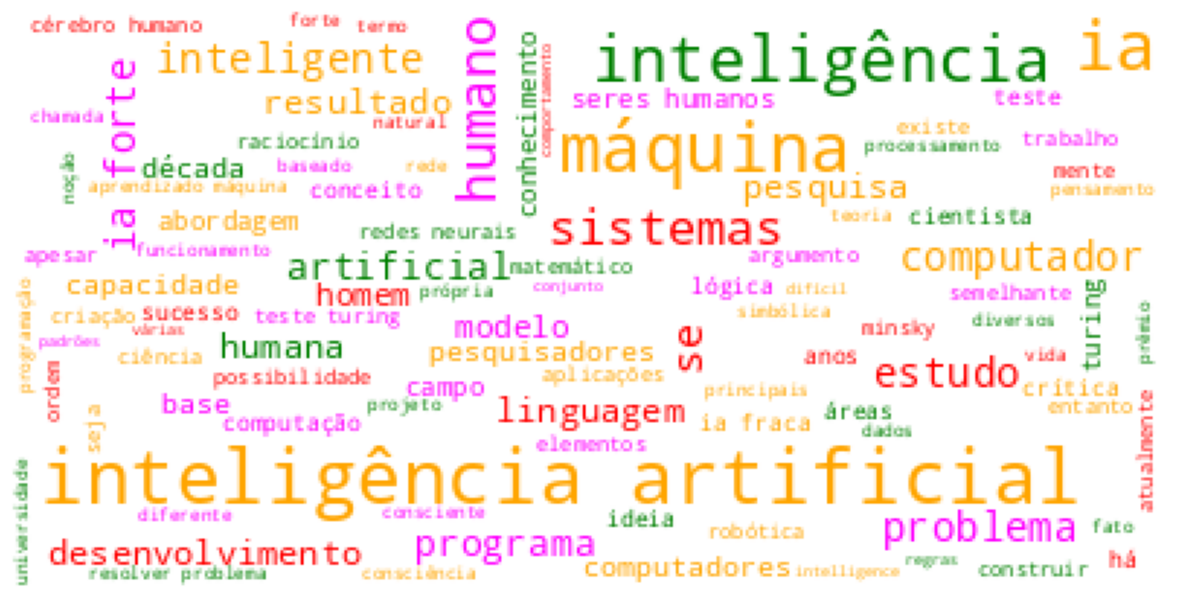

In [43]:
import matplotlib.pyplot as plt
cloud = cloud.generate(" ".join(without_stop_words))
plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

##Text classification using spaCy

In [44]:
!pip install spacy --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 96.5 MB/s eta 0:00:00
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pt-core-news-sm 3.7.0 requires spacy<3.8.0,>=3.7.0, but you have spacy 3.8.4 which is incompatible.
en-core-web-sm 3.7.1 requires spacy<3.8.0,>=3.7

In [45]:
!python3 -m spacy download pt_core_news


✘ No compatible package found for 'pt_core_news' (spaCy v3.8.4)



In [46]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
data_set = pd.read_csv('/content/drive/MyDrive/Bases de dados/base_treinamento.txt', encoding='utf-8')

In [49]:
data_set.shape

(196, 2)

In [50]:
data_set.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [51]:
data_set.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


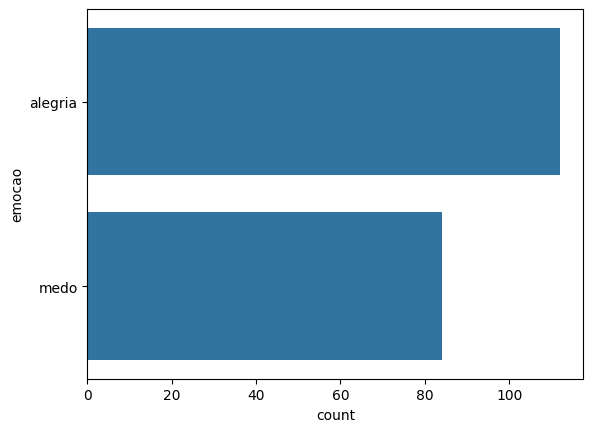

In [52]:
sns.countplot(data_set['emocao'], label='Contagem');

In [53]:
punctuation = string.punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [55]:
print(stop_words)

{'estivemos', 'iniciar', 'sete', 'até', 'assim', 'pontos', 'vossa', 'era', 'zero', 'nossos', 'és', 'vocês', 'coisa', 'nessa', 'vêm', 'estão', 'nesse', 'aqui', 'nossa', 'muitos', 'dez', 'fazes', 'embora', 'sua', 'nossas', 'tanta', 'somos', 'dizer', 'inicio', 'geral', 'meus', 'das', 'devem', 'eu', 'vários', 'me', 'dizem', 'suas', 'local', 'muito', 'fazia', 'lado', 'exemplo', 'porquanto', 'usar', 'parte', 'ser', 'mês', 'diz', 'estará', 'grupo', 'oitava', 'custa', 'dezassete', 'o', 'contra', 'minhas', 'te', 'sempre', 'inclusive', 'essas', 'tipo', 'porém', 'grandes', 'quando', 'baixo', 'faço', 'nível', 'faz', 'cima', 'cujo', 'oito', 'obrigado', 'primeira', 'já', 'para', 'qualquer', 'vezes', 'naquele', 'de', 'meses', 'ela', 'sexta', 'à', 'dá', 'antes', 'teus', 'às', 'do', 'ainda', 'aqueles', 'maioria', 'cento', 'somente', 'meio', 'ali', 'numa', 'sistema', 'num', 'podia', 'daquela', 'caminho', 'conhecida', 'podem', 'três', 'sexto', 'cá', 'deste', 'depois', 'acerca', 'nosso', 'aquela', 'todos'

In [56]:
len(stop_words)

416

In [57]:
pln = spacy.load('pt_core_news_sm')
pln

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [58]:
def preprocessing(text):
  text = text.lower()
  doc = pln(text)
  tokens = []

  for token in doc:
    #tokens.append(token.text)
    tokens.append(token.lemma_)

  tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
  tokens = ' '.join([str(element) for element in tokens if not element.isdigit()])
  return tokens;

In [59]:
est = preprocessing("Estou aprendendo processamento 1 10 23 de liguagem natural, curso em Curitiba")
est

'aprender processamento liguagem natural curso curitiba'

In [60]:
data_set.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [61]:
data_set['texto'] = data_set['texto'].apply(preprocessing)

In [62]:
data_set.head(10)

,texto,emocao
0,trabalho agradável,alegria
1,gosto ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria
5,adorar cabelo macio,alegria
6,adorar cor de o olho,alegria
7,somo amável outro,alegria
8,sinto afeição,alegria
9,querer agradar filho,alegria


In [65]:
final_data_set = []

for text, emotion in zip(data_set['texto'], data_set['emocao']):
  #print(text, emotion)

  dic = ({'ALEGRIA':emotion == 'alegria', 'MEDO':emotion == 'medo'})
  final_data_set.append([text, dic.copy()])

In [67]:
final_data_set[0]

['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}]

In [68]:
final_data_set[0][0]

'trabalho agradável'

In [69]:
final_data_set[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [70]:
type(final_data_set[0][1])

dict

In [71]:
final_data_set

[['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gosto ficar em o aconchego', {'ALEGRIA': True, 'MEDO': False}],
 ['fiz adesão a o curso hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelo macio', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cor de o olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somo amável outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amo', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixoneir', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sintar hoje', {'ALEGRIA': Tr

In [77]:
model = spacy.blank('pt')
textcat = model.add_pipe("textcat") # Add the textcat component

# Assuming 'ALEGRIA' and 'MEDO' are your desired labels
textcat.add_label("ALEGRIA")
textcat.add_label("MEDO")

history = []

model.begin_training() # Start training the model


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [79]:
from spacy.training import Example

for epoch in range(1000):
  random.shuffle(final_data_set)
  losses = {}

  for batch in spacy.util.minibatch(final_data_set, 30):
    # Convert data to Example objects
    examples = []
    for text, entities in batch:
      doc = model.make_doc(text)  # Create a Doc object from text
      example = Example.from_dict(doc, {'cats': entities})
      examples.append(example)

    model.update(examples, losses=losses) # Update the model with Example objects

    if epoch % 100 == 0:
      print(losses)
      history.append(losses)

{'textcat': 0.25}
{'textcat': 0.4986369460821152}
{'textcat': 0.7468130141496658}
{'textcat': 0.9949554800987244}
{'textcat': 1.2386953383684158}
{'textcat': 1.4888771325349808}
{'textcat': 1.729383185505867}
{'textcat': 8.039098033096881e-12}
{'textcat': 1.1716814150852795e-11}
{'textcat': 1.643172230225698e-11}
{'textcat': 2.4738472555185798e-11}
{'textcat': 2.7943291127166536e-11}
{'textcat': 3.2926029307558946e-11}
{'textcat': 3.4870892414926025e-11}
{'textcat': 1.1803571358173781e-12}
{'textcat': 1.744970053868533e-12}
{'textcat': 2.1159492072982816e-12}
{'textcat': 2.65843307111803e-12}
{'textcat': 3.1802217380794834e-12}
{'textcat': 4.10280991580865e-12}
{'textcat': 4.454397815227898e-12}
{'textcat': 1.5959503412831672e-13}
{'textcat': 3.768811570334721e-13}
{'textcat': 4.851904197421958e-13}
{'textcat': 6.321960912668984e-13}
{'textcat': 8.366074624515871e-13}
{'textcat': 9.984666901868139e-13}
{'textcat': 1.1981130199284831e-12}
{'textcat': 8.461645013141395e-14}
{'textcat': 1

In [80]:
history_loss = []

for i in history:
  history_loss.append(i['textcat'])

In [81]:
history_loss = np.array(history_loss)

In [82]:
history_loss

array([1.72938319e+00, 1.72938319e+00, 1.72938319e+00, 1.72938319e+00,
       1.72938319e+00, 1.72938319e+00, 1.72938319e+00, 3.48708924e-11,
       3.48708924e-11, 3.48708924e-11, 3.48708924e-11, 3.48708924e-11,
       3.48708924e-11, 3.48708924e-11, 4.45439782e-12, 4.45439782e-12,
       4.45439782e-12, 4.45439782e-12, 4.45439782e-12, 4.45439782e-12,
       4.45439782e-12, 1.19811302e-12, 1.19811302e-12, 1.19811302e-12,
       1.19811302e-12, 1.19811302e-12, 1.19811302e-12, 1.19811302e-12,
       4.44818133e-13, 4.44818133e-13, 4.44818133e-13, 4.44818133e-13,
       4.44818133e-13, 4.44818133e-13, 4.44818133e-13, 1.81803316e-13,
       1.81803316e-13, 1.81803316e-13, 1.81803316e-13, 1.81803316e-13,
       1.81803316e-13, 1.81803316e-13, 8.11414170e-14, 8.11414170e-14,
       8.11414170e-14, 8.11414170e-14, 8.11414170e-14, 8.11414170e-14,
       8.11414170e-14, 4.13308753e-14, 4.13308753e-14, 4.13308753e-14,
       4.13308753e-14, 4.13308753e-14, 4.13308753e-14, 4.13308753e-14,
      

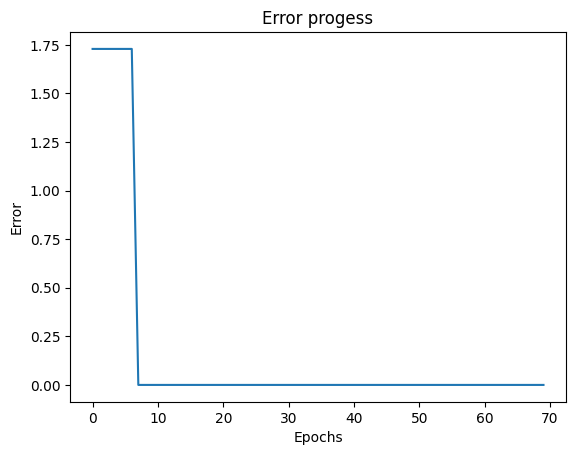

In [83]:
import matplotlib.pyplot as plt
plt.plot(history_loss)
plt.title('Error progess')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [85]:
from operator import mod
model.to_disk('/content/drive/MyDrive/model')

In [86]:
loaded_model = spacy.load('/content/drive/MyDrive/model')
loaded_model

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [87]:
positive_text = 'Eu adoro a cor dos seus olhos'
positive_text = preprocessing(positive_text)
positive_text

'adorar cor de o olho'

In [88]:
predict = loaded_model(positive_text)
predict

adorar cor de o olho

In [89]:
predict.cats

{'ALEGRIA': 1.0, 'MEDO': 3.671953408002082e-08}

In [90]:
negative_text =  "Estou com medo dele"
negative_text = preprocessing(negative_text)
negative_text

'medo de ele'

In [91]:
predict = loaded_model(negative_text)
predict

medo de ele

In [92]:
predict.cats

{'ALEGRIA': 9.735725825521513e-08, 'MEDO': 0.9999998807907104}

In [93]:
predicts = []
for text in data_set['texto']:
  predict = loaded_model(text)
  predicts.append(predict.cats)

In [94]:
predicts

[{'ALEGRIA': 1.0, 'MEDO': 5.965693272713679e-09},
 {'ALEGRIA': 0.9999998807907104, 'MEDO': 8.127463502205501e-08},
 {'ALEGRIA': 1.0, 'MEDO': 6.655795470322801e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.4286463567714236e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.7995059603824757e-09},
 {'ALEGRIA': 1.0, 'MEDO': 2.40450912514234e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.671953408002082e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.2250123521416754e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.952228956270119e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.3389863318689095e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.0602712485763277e-08},
 {'ALEGRIA': 1.0, 'MEDO': 7.703235382905405e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.9249697391643394e-09},
 {'ALEGRIA': 1.0, 'MEDO': 8.337369905575542e-09},
 {'ALEGRIA': 1.0, 'MEDO': 4.923185059624302e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.340619964513735e-08},
 {'ALEGRIA': 1.0, 'MEDO': 6.387047779554678e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.0255393867453222e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.2101474489156772e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.

In [95]:
final_predict = []

for predict in predicts:
  if predict['ALEGRIA'] > predict['MEDO']:
    final_predict.append('alegria')
  else:
    final_predict.append('medo')

final_predict = np.array(final_predict)
final_predict

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [97]:
real_responses = data_set['emocao'].values
real_responses

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(real_responses, final_predict)

1.0

In [99]:
cm = confusion_matrix(real_responses, final_predict)
cm

array([[112,   0],
       [  0,  84]])

In [100]:
dataset_test = pd.read_csv('/content/drive/MyDrive/Bases de dados/base_teste.txt', encoding='utf-8')

In [101]:
dataset_test.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [102]:
dataset_test['texto'] = dataset_test['texto'].apply(preprocessing)

In [103]:
dataset_test.head()

,texto,emocao
0,precisar pagar ingresso,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar,alegria
3,afortunar,alegria
4,benéfico medida,alegria


In [104]:
predicts = []
for text in dataset_test['texto']:
  predict = loaded_model(text)
  predicts.append(predict.cats)

In [105]:
final_predict = []

for predict in predicts:
  if predict['ALEGRIA'] > predict['MEDO']:
    final_predict.append('alegria')
  else:
    final_predict.append('medo')

final_predict = np.array(final_predict)
final_predict

array(['medo', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'medo', 'alegria', 'alegria', 'alegria', 'alegria', 'medo',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'medo',
       'alegria', 'alegria', 'alegria', 'medo', 'medo', 'alegria', 'medo',
       'alegria', 'alegria', 'medo', 'medo', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'medo', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'medo',
       'medo', 'alegria', 'medo', 'alegria', 'medo', 'alegria', 'alegria',
       'alegria', 'medo', 'alegria', 'alegria', 'alegria', 'medo', 'medo',
       'medo', 'medo', 'alegria', 'alegria', 'medo', 'alegria', 'medo',
       'alegria', 'alegria', 'medo', 'alegria', 'alegria', 'medo',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'medo',
       'medo', 'medo', 'medo', 'medo', 'alegria', 'alegria', 'medo',
       'alegria'], dtype='<U7')

In [106]:
real_responses = dataset_test['emocao'].values
real_responses

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo'], dtype=object)

In [107]:
accuracy_score(real_responses, final_predict)

0.5833333333333334

In [108]:
cm = confusion_matrix(real_responses, final_predict)
cm

array([[34, 14],
       [21, 15]])

In [139]:
dataset_training = pd.read_csv("/content/drive/MyDrive/Bases de dados/Train50.csv", delimiter=';')

In [140]:
dataset_training.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


In [141]:
dataset_training.shape

(50000, 5)

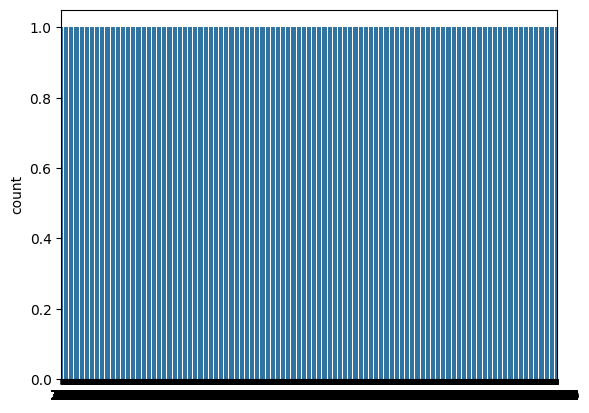

In [142]:
sns.countplot(dataset_training['sentiment'], label='sentiment');

In [143]:
dataset_training.drop(['id', 'tweet_date', 'query_used'], axis=1, inplace=True)

In [144]:
dataset_training.head()

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


<Axes: >

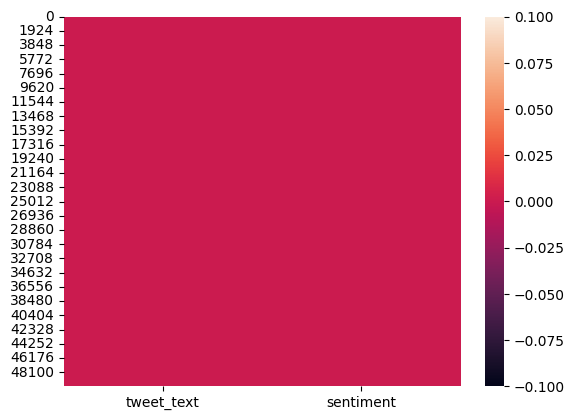

In [145]:
sns.heatmap(pd.isnull(dataset_training))

In [146]:
dataset_test = pd.read_csv("/content/drive/MyDrive/Bases de dados/Test.csv", delimiter=';')

In [147]:
dataset_test.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)


In [148]:
dataset_test.shape

(5000, 5)

In [149]:
dataset_test.drop(['id', 'tweet_date', 'query_used'], axis=1, inplace=True)

In [150]:
dataset_test.head()

,tweet_text,sentiment
0,@Gazo1a Nossa! Muito obrigada :),1
1,@BerzGamer vai pa puta que te pariu :),1
2,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,1
3,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",1
4,Estávamos em casa do Zé e eu estava a morrer d...,1


<Axes: >

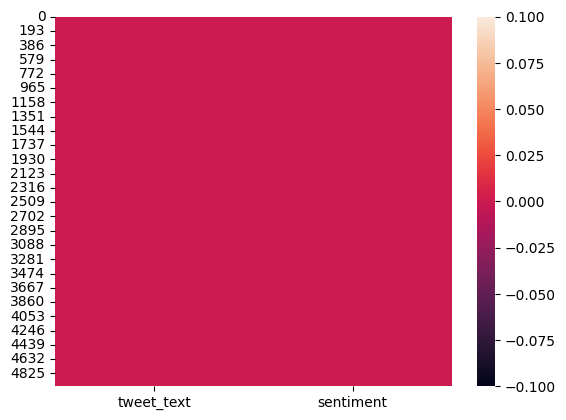

In [151]:
sns.heatmap(pd.isnull(dataset_test))

In [152]:
import re

In [153]:
def preprocessing(text):
  text = text.lower()
  text = re.sub(r"@[A-Za-z0-9$-_@.&+]+", " ", text)
  text= re.sub(r"https?://[A-Za-z0-9./]+", " ", text)
  text = re.sub(r" +", " ", text)

  emotion_list = {
      ':)':"emocaopositiva",
      ':d':"emocaopositiva",
      ':(':"emocaonegativa",
  }

  for emotion in emotion_list:
    text = text.replace(emotion, emotion_list[emotion])

  doc = pln(text)
  tokens = []

  for token in doc:
    #tokens.append(token.text)
    tokens.append(token.lemma_)

  tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
  tokens = ' '.join([str(element) for element in tokens if not element.isdigit()])
  return tokens;

In [154]:
dataset_training.head(10)

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1
5,@KingJokerLeto mas amiga eu to aqui ainda :),1
6,"@RivasJairo Bravo, Jairo!!! :)))",1
7,@inquilinasls @Spotify socorro ksoaksosks acho...,1
8,"@chimekarlla gosto muito de fazenda :) , mas m...",1
9,Amanha vou ver venom :D,1


In [155]:
dataset_training['tweet_text'] = dataset_training['tweet_text'].apply(preprocessing)

In [156]:
dataset_training.head(10)

,tweet_text,sentiment
0,pessoa certo vale azevedo emocaopositivo,1
1,precisamente contrário emocaopositiva vir ch...,1
2,video hoje ... pensar falar meta de o csgo pag...,1
3,Aaaaaaaa amei polaroids expressar to apaixonar...,1
4,valorizar coração de o menininho vc diferente ...,1
5,amiga to emocaopositivo,1
6,bravo jairo emocaopositivo,1
7,socorro ksoaksosks achar to em o caixinha so...,1
8,gostar fazenda emocaopositivo morro medo gal...,1
9,amanha venom emocaopositivo,1


In [157]:
dataset_test['tweet_text'] = dataset_test['tweet_text'].apply(preprocessing)

In [158]:
dataset_test.head(10)

,tweet_text,sentiment
0,emocaopositivo,1
1,pa puta parir emocaopositiva,1
2,querer desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 confiro em o...,1
3,vcs ajudar galera por o amor butera emocaoposi...,1
4,casa de o zé morrer sono chegar casa fico sono...,1
5,precisar emocaopositivo,1
6,acaso adorar beijo abraço hahahahaha bue fof...,1
7,solteiro s sozinho emocaopositivo,1
8,lindeza cortador kit Mário coleção ber Cravol ...,1
9,claro emocaopositivo,1


In [202]:
final_data_set = []

for text, emotion in zip(dataset_training['tweet_text'], dataset_training['sentiment']):
  #print(text, emotion)

  dic = ({'POSITIVO':emotion == 1, 'NEGATIVO':emotion == 0})
  final_data_set.append([text, dic.copy()])

In [203]:

model = spacy.blank('pt')
textcat = model.add_pipe("textcat") # Add the textcat component

# Assuming 'POSITIVO' and 'NEGATIVO' are your desired labels
textcat.add_label("POSITIVO")
textcat.add_label("NEGATIVO")

history = []

model.begin_training() # Start training the model

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [204]:
from spacy.training import Example

for epoch in range(3):
  random.shuffle(final_data_set)
  losses = {}

  for batch in spacy.util.minibatch(final_data_set, 512):
    # Convert data to Example objects
    examples = []
    for text, entities in batch:
      doc = model.make_doc(text)  # Create a Doc object from text
      example = Example.from_dict(doc, {'cats': entities})
      examples.append(example)

    model.update(examples, losses=losses) # Update the model with Example objects

    if epoch % 100 == 0:
      print(losses)
      history.append(losses)

{'textcat': 0.25}
{'textcat': 0.4932064414024353}
{'textcat': 0.7205082178115845}
{'textcat': 0.919781357049942}
{'textcat': 1.0821766555309296}
{'textcat': 1.2051096111536026}
{'textcat': 1.2963744550943375}
{'textcat': 1.3566814735531807}
{'textcat': 1.4004282914102077}
{'textcat': 1.4301470033824444}
{'textcat': 1.4477714989334345}
{'textcat': 1.4573862655088305}
{'textcat': 1.4631050918251276}
{'textcat': 1.4704073290340602}
{'textcat': 1.4759192285127938}
{'textcat': 1.4832241316325963}
{'textcat': 1.4872473790310323}
{'textcat': 1.4918327201157808}
{'textcat': 1.4944772159215063}
{'textcat': 1.4978943336755037}
{'textcat': 1.5020358148030937}
{'textcat': 1.5066778366453946}
{'textcat': 1.5083085198421031}
{'textcat': 1.5113818978425115}
{'textcat': 1.5152816355694085}
{'textcat': 1.5172213047044352}
{'textcat': 1.5222789795370772}
{'textcat': 1.5251287299906835}
{'textcat': 1.5278372111497447}
{'textcat': 1.5296835539629683}
{'textcat': 1.531543851015158}
{'textcat': 1.5348847076

In [205]:
history_loss = []

for i in history:
  history_loss.append(i['textcat'])

In [206]:
history_loss = np.array(history_loss)
history_loss

array([1.70249109, 1.70249109, 1.70249109, 1.70249109, 1.70249109,
       1.70249109, 1.70249109, 1.70249109, 1.70249109, 1.70249109,
       1.70249109, 1.70249109, 1.70249109, 1.70249109, 1.70249109,
       1.70249109, 1.70249109, 1.70249109, 1.70249109, 1.70249109,
       1.70249109, 1.70249109, 1.70249109, 1.70249109, 1.70249109,
       1.70249109, 1.70249109, 1.70249109, 1.70249109, 1.70249109,
       1.70249109, 1.70249109, 1.70249109, 1.70249109, 1.70249109,
       1.70249109, 1.70249109, 1.70249109, 1.70249109, 1.70249109,
       1.70249109, 1.70249109, 1.70249109, 1.70249109, 1.70249109,
       1.70249109, 1.70249109, 1.70249109, 1.70249109, 1.70249109,
       1.70249109, 1.70249109, 1.70249109, 1.70249109, 1.70249109,
       1.70249109, 1.70249109, 1.70249109, 1.70249109, 1.70249109,
       1.70249109, 1.70249109, 1.70249109, 1.70249109, 1.70249109,
       1.70249109, 1.70249109, 1.70249109, 1.70249109, 1.70249109,
       1.70249109, 1.70249109, 1.70249109, 1.70249109, 1.70249

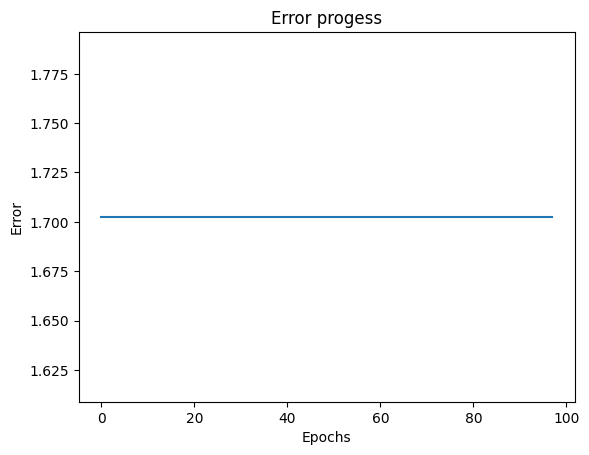

In [207]:
plt.plot(history_loss)
plt.title('Error progess')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [208]:
from operator import mod
model.to_disk('/content/drive/MyDrive/twitter_model')

In [209]:
loaded_model = spacy.load('/content/drive/MyDrive/twitter_model')
loaded_model

In [210]:
positive_text = dataset_test['tweet_text'][4000]
positive_text

'tô triste de o filme de o mulan mushu emocaonegativo'

In [211]:
predict = loaded_model(positive_text)
predict

tô triste de o filme de o mulan mushu emocaonegativo

In [212]:
predict.cats

{'POSITIVO': 2.589303882416516e-08, 'NEGATIVO': 1.0}

In [213]:
positive_text = "Eu gosto de você"
positive_text = preprocessing(positive_text)
positive_text

'gostar'

In [214]:
loaded_model(positive_text).cats

{'POSITIVO': 0.9999940395355225, 'NEGATIVO': 5.910132131248247e-06}

In [215]:
dataset_test['tweet_text'][4000]

'tô triste de o filme de o mulan mushu emocaonegativo'

In [216]:
predicts = []
for text in dataset_test['tweet_text']:  # Use dataset_test instead of dataset_training
  predict = loaded_model(text)
  predicts.append(predict.cats)

final_predict = []

for predict in predicts:
  if predict['POSITIVO'] > predict['NEGATIVO']:
    final_predict.append(1)
  else:
    final_predict.append(0)

final_predict = np.array(final_predict)

In [217]:
real_responses = dataset_test['sentiment'].values

In [218]:
accuracy_score(real_responses, final_predict)

0.9966

In [219]:
cm = confusion_matrix(real_responses, final_predict)
cm

array([[2491,    9],
       [   8, 2492]])

<Axes: >

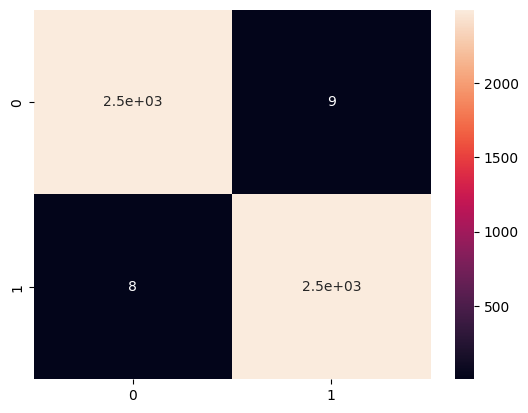

In [220]:
sns.heatmap(cm, annot=True)